In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
gapminder_df = pd.read_csv('gapminder.tsv', sep='\t') #Read the dataset
gapminder_df.head() #Display first few rows


country continent  year  lifeExp       pop   gdpPercap
0  Afghanistan      Asia  1952   28.801   8425333  779.445314
1  Afghanistan      Asia  1957   30.332   9240934  820.853030
2  Afghanistan      Asia  1962   31.997  10267083  853.100710
3  Afghanistan      Asia  1967   34.020  11537966  836.197138
4  Afghanistan      Asia  1972   36.088  13079460  739.981106

In [ ]:
recent_year = gapminder_df.year.max() #Get the most recent year
recent_year_df = gapminder_df[gapminder_df['year'] == recent_year] #Filter the dataframe based on the most recent year
recent_year_df  #recent_year_df.shape #Shape of the new dataframe

country continent  year  lifeExp       pop     gdpPercap
11           Afghanistan      Asia  2007   43.828  31889923    974.580338
23               Albania    Europe  2007   76.423   3600523   5937.029526
35               Algeria    Africa  2007   72.301  33333216   6223.367465
47                Angola    Africa  2007   42.731  12420476   4797.231267
59             Argentina  Americas  2007   75.320  40301927  12779.379640
...                  ...       ...   ...      ...       ...           ...
1655             Vietnam      Asia  2007   74.249  85262356   2441.576404
1667  West Bank and Gaza      Asia  2007   73.422   4018332   3025.349798
1679         Yemen, Rep.      Asia  2007   62.698  22211743   2280.769906
1691              Zambia    Africa  2007   42.384  11746035   1271.211593
1703            Zimbabwe    Africa  2007   43.487  12311143    469.709298

[142 rows x 6 columns]

In [ ]:
recent_year_df['gdpPercap'].describe()

count      142.000000
mean     11680.071820
std      12859.937337
min        277.551859
25%       1624.842248
50%       6124.371108
75%      18008.835640
max      49357.190170
Name: gdpPercap, dtype: float64

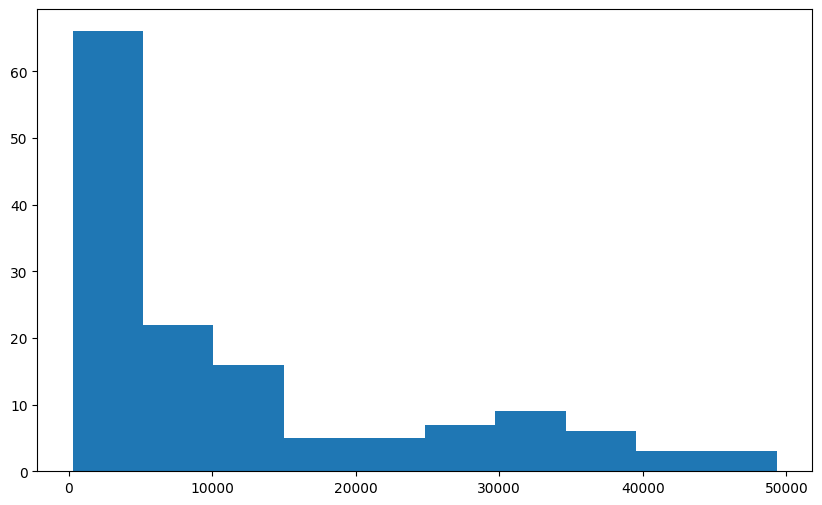

In [ ]:
plt.figure(figsize=(10, 6)) #Create a figure
plt.hist(recent_year_df['gdpPercap']); #Plot the histogram


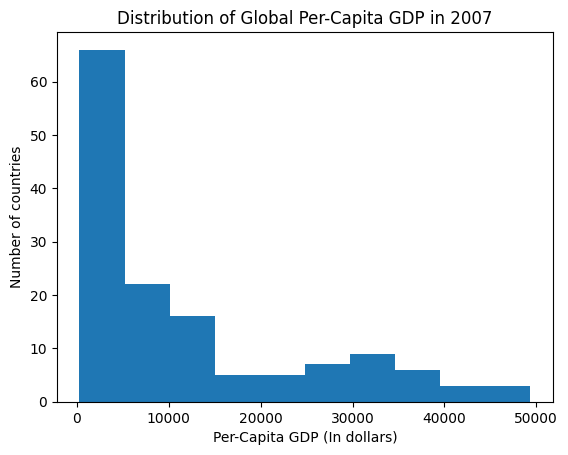

In [ ]:
plt.hist(recent_year_df['gdpPercap'])
plt.title('Distribution of Global Per-Capita GDP in 2007')
plt.xlabel('Per-Capita GDP (In dollars)')
plt.ylabel('Number of countries');

# **Bar plots**

In [ ]:
countries_df = gapminder_df[['country', 'continent']] #New dataframe with selected features
countries_df = countries_df.drop_duplicates() #Drop duplicate combinations
countries_df.shape

(142, 2)

In [ ]:
country_counts_df = countries_df.groupby('continent', as_index=False).agg('count')
country_counts_df.head()

continent  country
0    Africa       52
1  Americas       25
2      Asia       33
3    Europe       30
4   Oceania        2

In [ ]:
no_continents = len(country_counts_df)
x = range(no_continents)
print(x)

range(0, 5)


In [ ]:
y = country_counts_df['country']
continents = country_counts_df['continent']
print(continents)


0      Africa
1    Americas
2        Asia
3      Europe
4     Oceania
Name: continent, dtype: object


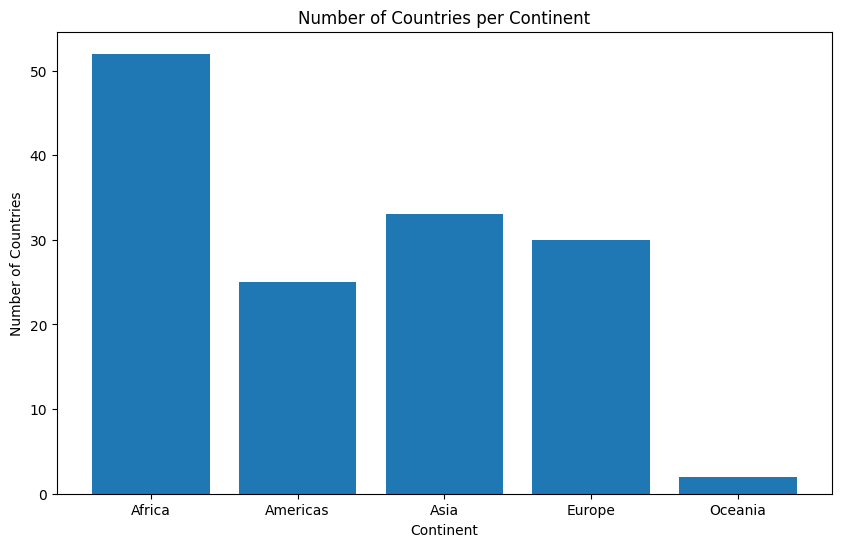

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(x, y) #Plot bar graph
plt.xlabel('Continent')
plt.ylabel('Number of Countries');
plt.title('Number of Countries per Continent')
plt.xticks(x, continents);

# **Box plots**

In [ ]:
continent_gdp_recent = []
for c in continents:
  cur_cont = recent_year_df[recent_year_df['continent'] == c] #New dataframe for current continent
  cur_gdp_vals = cur_cont['gdpPercap'].values #Store Per-capita GDP values of current continent in an array
  continent_gdp_recent.append(cur_gdp_vals) #Append values to the list

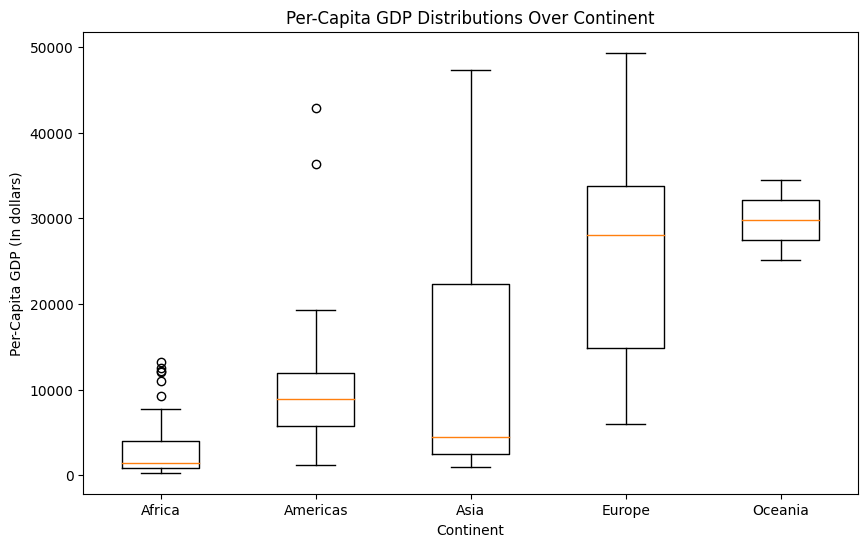

In [ ]:
plt.figure(figsize=(10, 6))
plt.boxplot(continent_gdp_recent)
plt.title('Per-Capita GDP Distributions Over Continent')
plt.xlabel('Continent')
plt.ylabel('Per-Capita GDP (In dollars)')
plt.xticks(range(1, len(continents) + 1), continents);

# **Line plots**

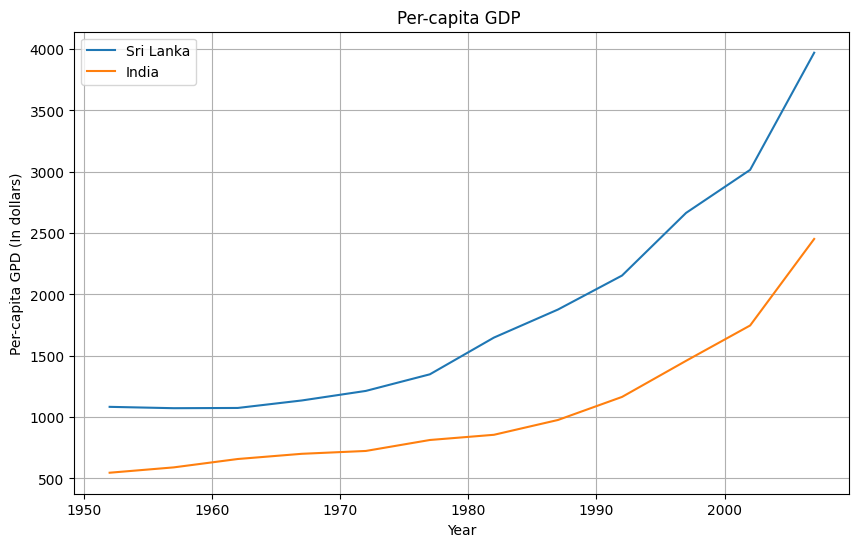

In [ ]:
lk = gapminder_df[gapminder_df['country'] == 'Sri Lanka']
lk1 = gapminder_df[gapminder_df['country'] == 'India']

plt.figure(figsize=(10, 6))
plt.plot(lk['year'], lk['gdpPercap'],label='Sri Lanka')
plt.plot(lk1['year'], lk1['gdpPercap'],label='India')
plt.legend()
plt.title('Per-capita GDP ')
plt.xlabel('Year')
plt.ylabel('Per-capita GPD (In dollars)')
plt.grid();

# **Scatter plots**

Text(0, 0.5, 'Life Expectancy (In years)')

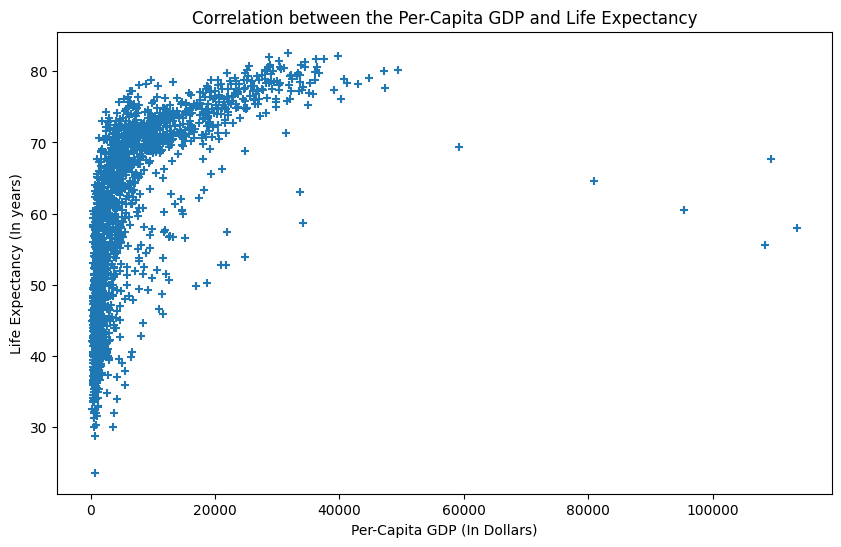

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(gapminder_df['gdpPercap'], gapminder_df['lifeExp'], marker='+')
plt.title('Correlation between the Per-Capita GDP and Life Expectancy')
plt.xlabel('Per-Capita GDP (In Dollars)')
plt.ylabel('Life Expectancy (In years)')

# **Heatmaps**

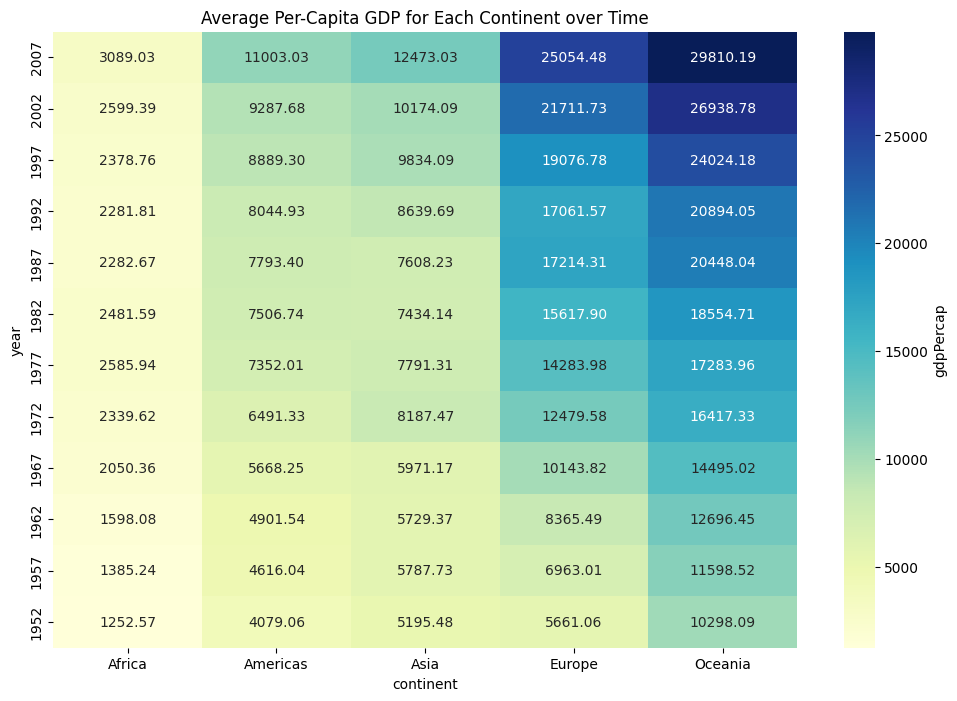

In [ ]:

per_continent_mean_gdp_df = gapminder_df.groupby(['continent', 'year'],
as_index=False)['gdpPercap'].mean()
plt.figure(figsize=(12, 8))
heatmap = per_continent_mean_gdp_df.pivot(index="year",columns="continent",values="gdpPercap")
heatmap = heatmap.sort_index(ascending=False)
heatmap_graph = sns.heatmap(heatmap, annot=True, fmt=".2f", cmap='YlGnBu',cbar_kws={'label': "gdpPercap"})
plt.title("Average Per-Capita GDP for Each Continent over Time");

# **Regression plots**

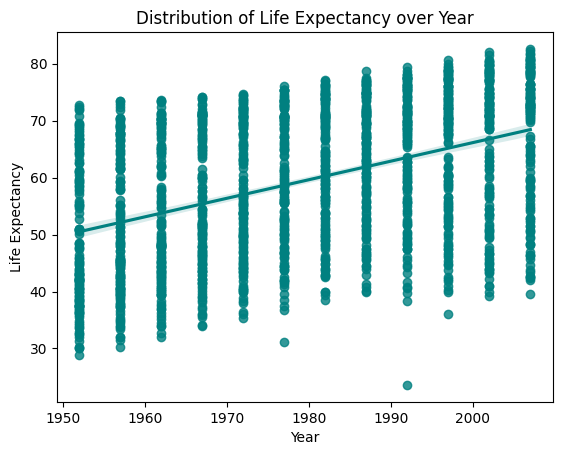

In [ ]:
sns.regplot(x='year', y='lifeExp', data=gapminder_df, color='teal')
plt.title('Distribution of Life Expectancy over Year')
plt.xlabel('Year')
plt.ylabel('Life Expectancy');

# **Kernel Density Estimate plots**

<ipython-input-49-a0d51665a2ca>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(recent_year_df['gdpPercap'], shade=True)


<Axes: xlabel='gdpPercap', ylabel='Density'>

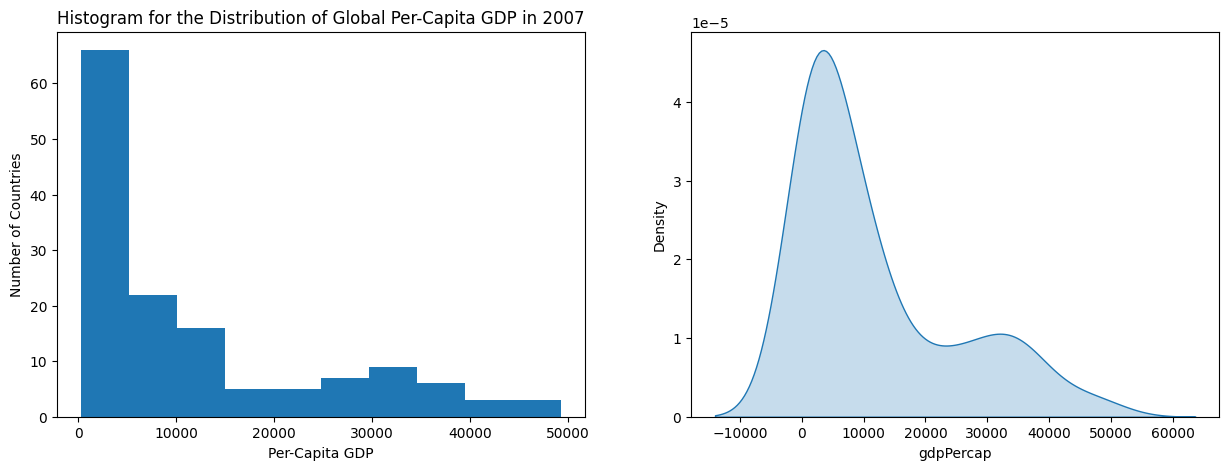

In [ ]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.hist(recent_year_df['gdpPercap'])
plt.xlabel('Per-Capita GDP')
plt.ylabel("Number of Countries")
plt.title('Histogram for the Distribution of Global Per-Capita GDP in 2007')
plt.subplot(1, 2, 2)
sns.kdeplot(recent_year_df['gdpPercap'], shade=True)

In [ ]:
plt.savefig('plot.png', dpi=400, bbox_inches ='tight')

<Figure size 640x480 with 0 Axes>

# **TO DO 3**

In [ ]:
df = pd.read_csv('winequality_red.csv', sep=',')
df.head()


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [ ]:
# check for missing values
print(df.isnull().sum())

fixed acidity            0
volatile acidity        14
citric acid              0
residual sugar          12
chlorides                0
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       5
sulphates                0
alcohol                  0
quality                  0
dtype: int64


In [ ]:
df.dropna(inplace=True)

print(df.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


<Axes: >

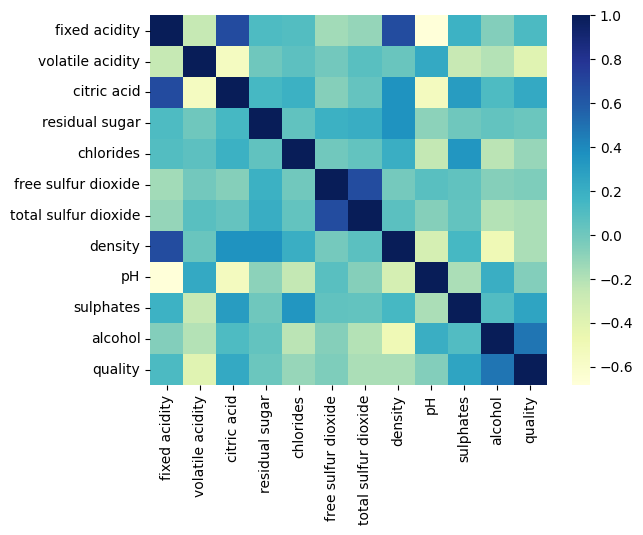

In [ ]:
# create a correlation matrix
corr_matrix = df.corr()

# visualize the correlation matrix as a heatmap
sns.heatmap(corr_matrix, cmap="YlGnBu")



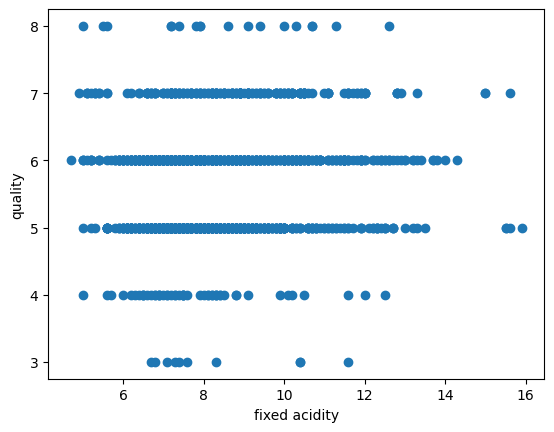

In [ ]:
# create scatter plots of quality vs. each attribute
plt.scatter(df['fixed acidity'], df['quality'])
plt.xlabel('fixed acidity')
plt.ylabel('quality')
plt.show()



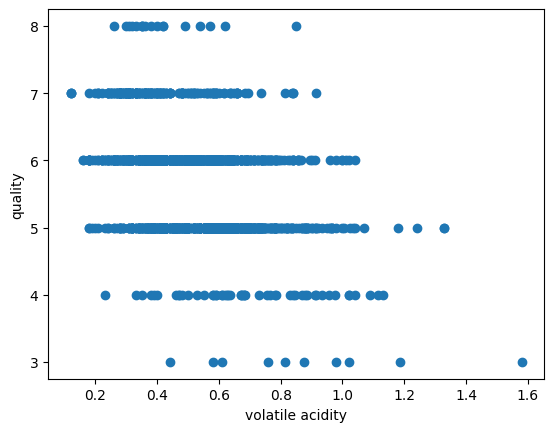

In [ ]:
plt.scatter(df['volatile acidity'], df['quality'])
plt.xlabel('volatile acidity')
plt.ylabel('quality')
plt.show()



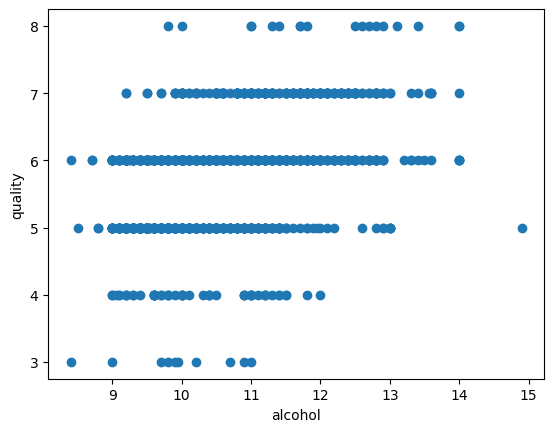

In [ ]:
plt.scatter(df['alcohol'], df['quality'])
plt.xlabel('alcohol')
plt.ylabel('quality')
plt.show()

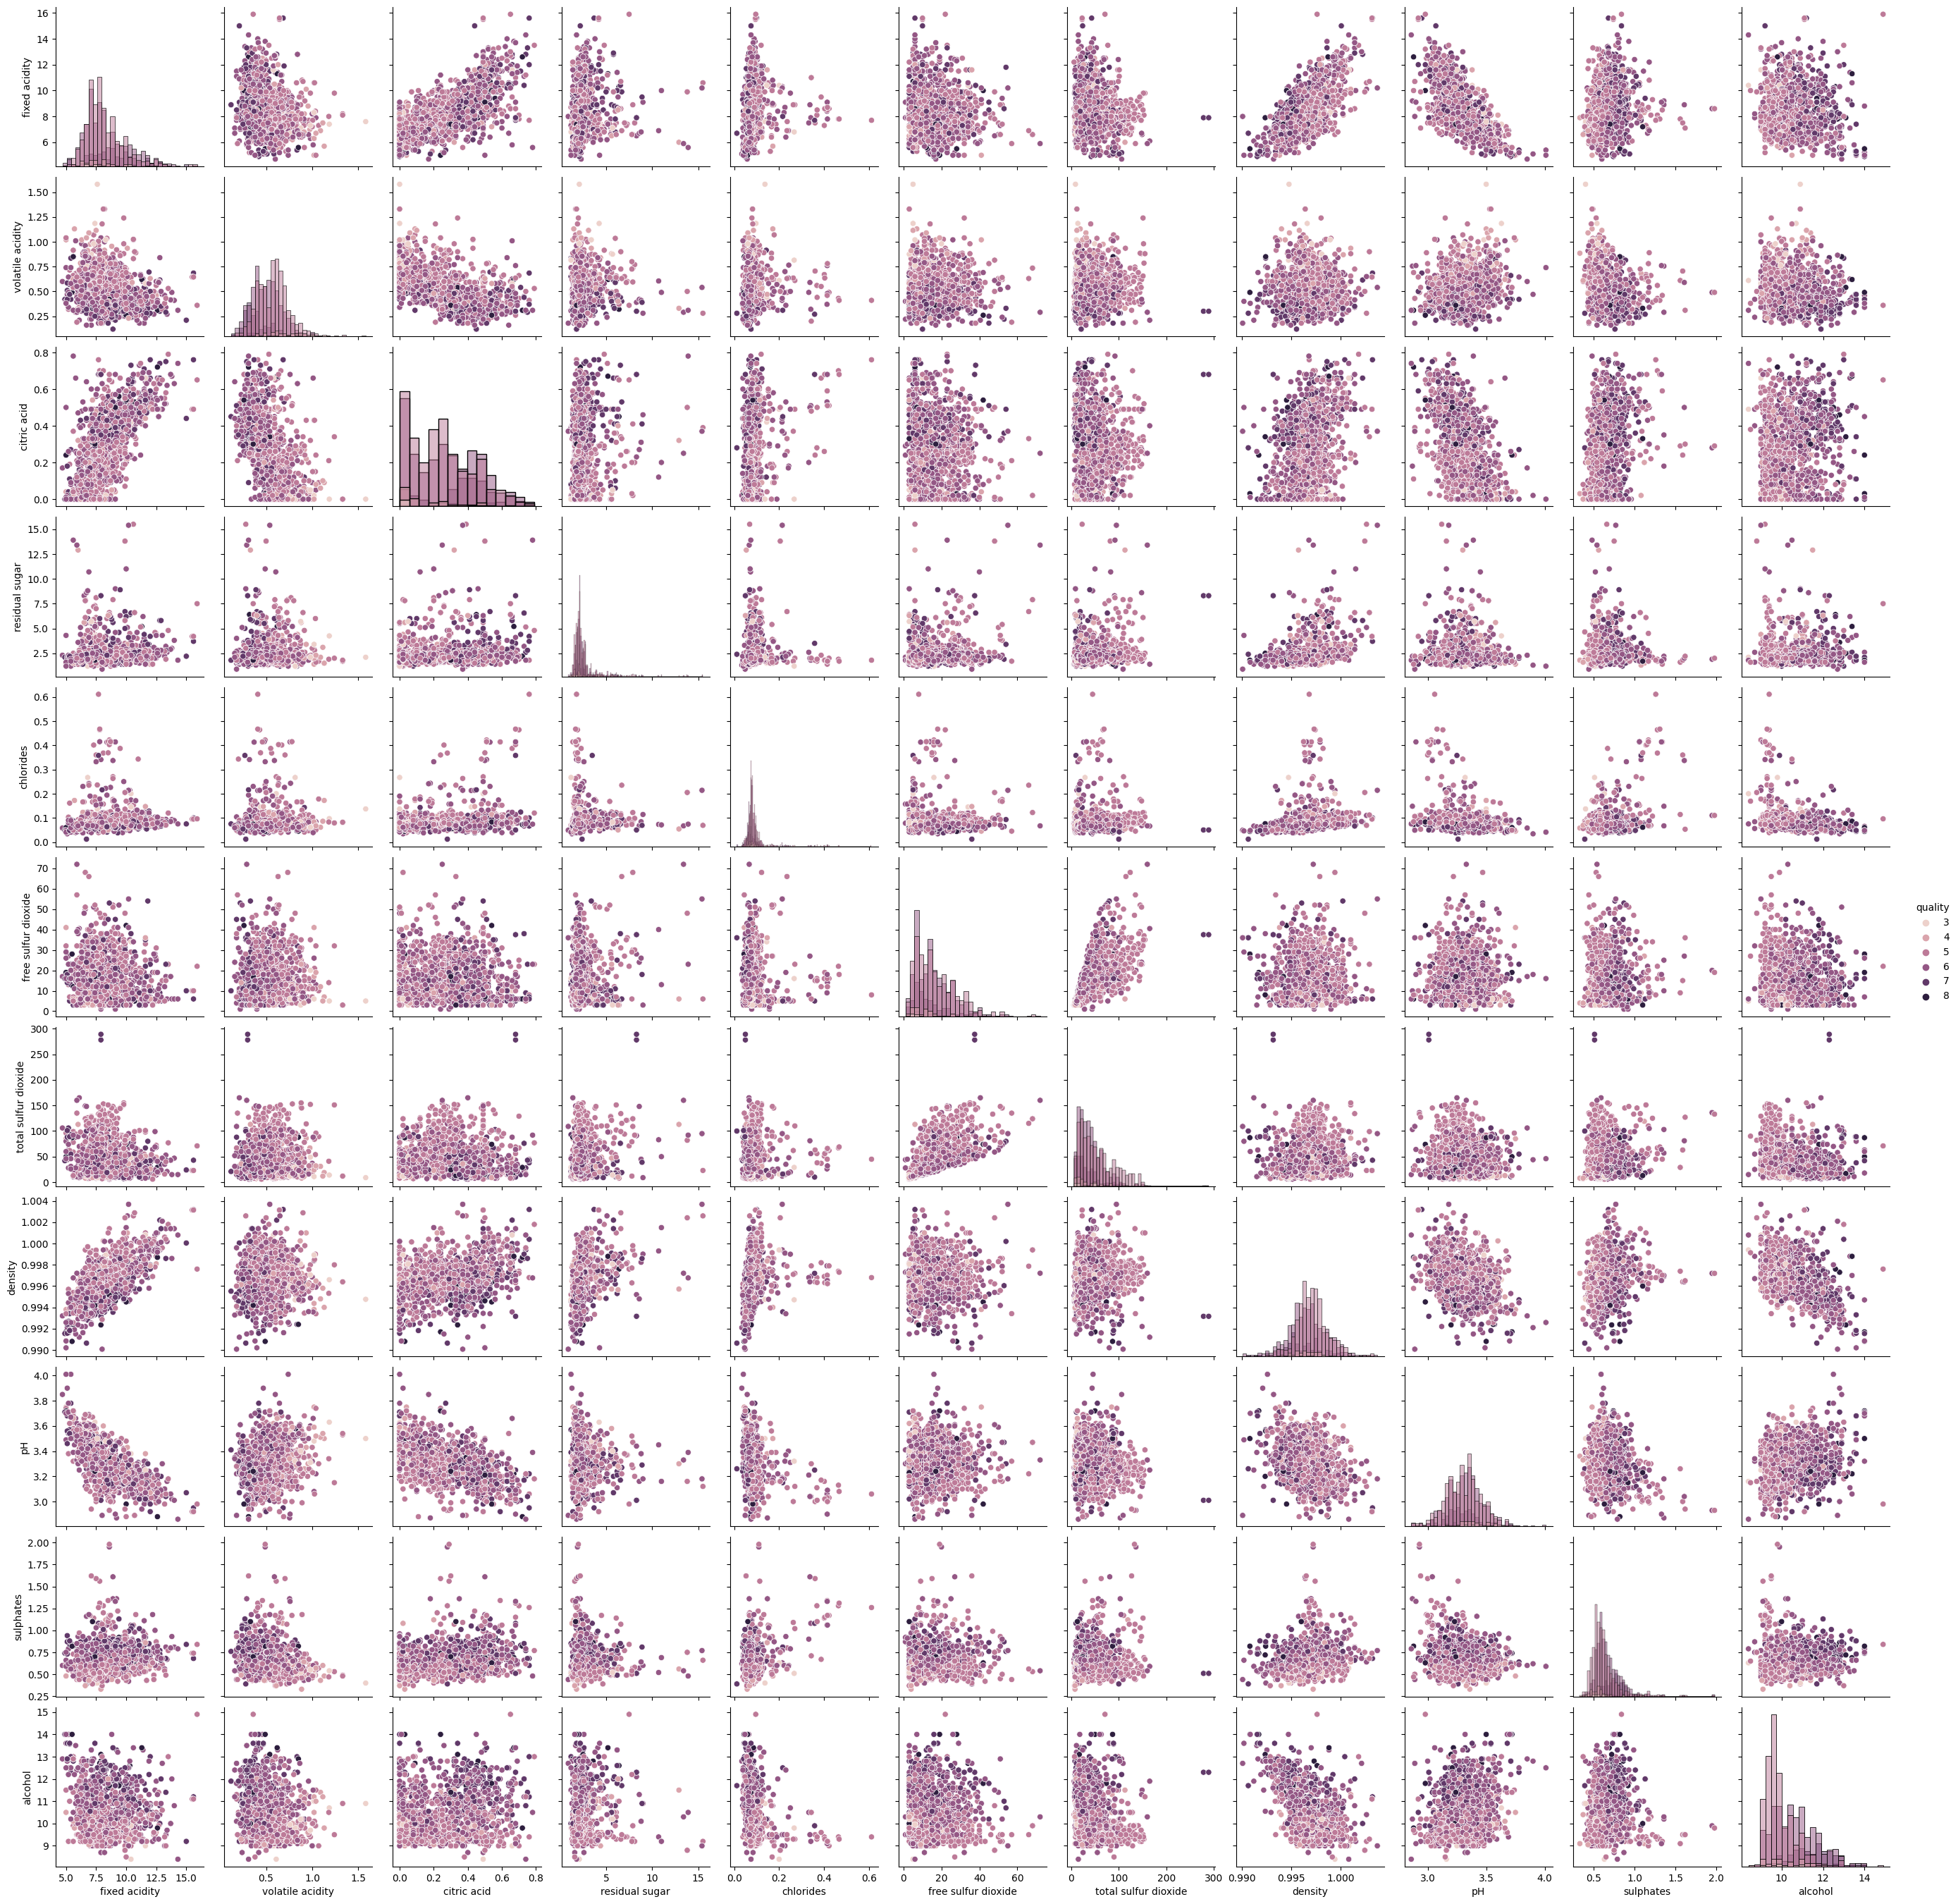

In [ ]:
# create a scatter matrix
sns.pairplot(df, vars=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'], hue='quality', diag_kind='hist')

# display the scatter matrix
plt.show()


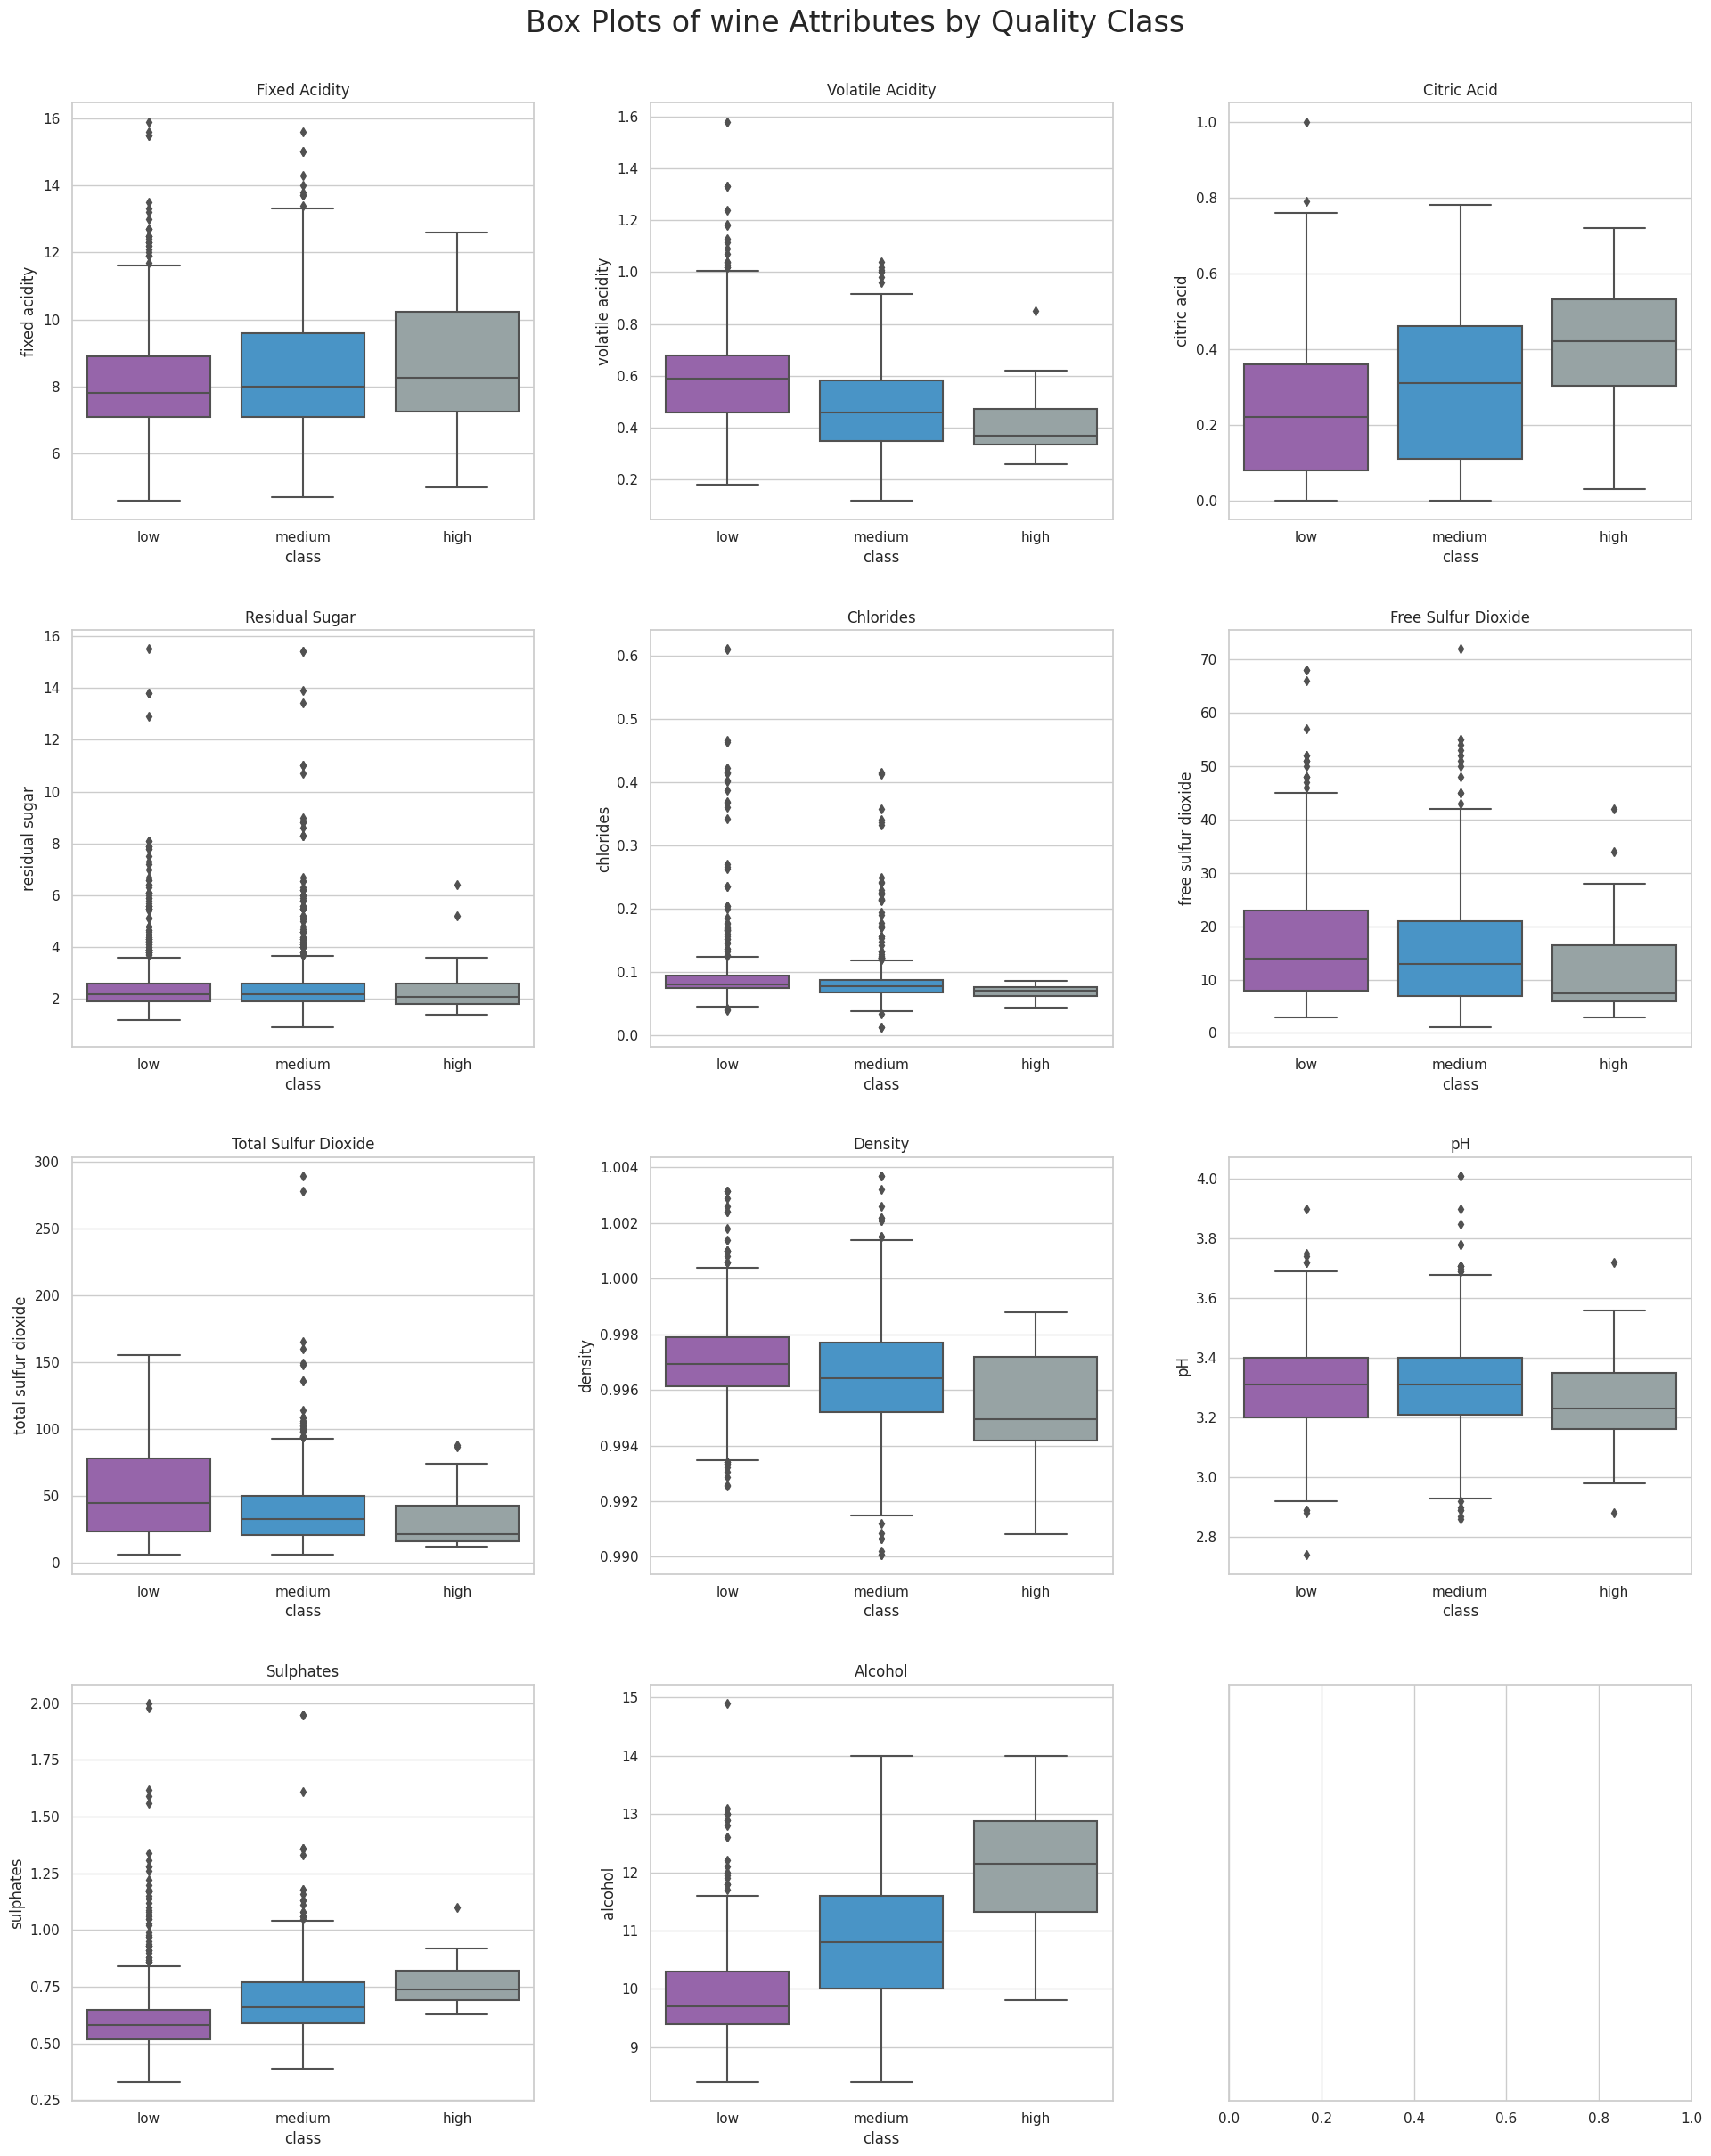

In [75]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

df=pd.read_csv('winequality_red.csv',sep=',')

df['class']=pd.cut(df['quality'],bins=[0,5,7,10],labels=['low','medium','high'])

sns.set_palette(['#9b59b6','#3498db','#95a5a6'])


fig,axs=plt.subplots(nrows=4,ncols=3, figsize=(20,25))

sns.boxplot(data=df,x='class', y='fixed acidity',ax=axs[0,0]) 
sns.boxplot(data=df,x='class', y='volatile acidity',ax=axs[0,1]) 
sns.boxplot(data=df,x='class', y='citric acid',ax=axs[0,2]) 
sns.boxplot(data=df,x='class', y='residual sugar',ax=axs[1,0]) 
sns.boxplot(data=df,x='class', y='chlorides',ax=axs[1,1])
sns.boxplot(data=df,x='class', y='free sulfur dioxide',ax=axs[1,2]) 
sns.boxplot(data=df,x='class', y='total sulfur dioxide',ax=axs[2,0])
sns.boxplot(data=df,x='class', y='density',ax=axs[2,1]) 
sns.boxplot(data=df,x='class', y='pH',ax=axs[2,2]) 
sns.boxplot(data=df,x='class', y='sulphates',ax=axs[3,0]) 
sns.boxplot(data=df,x='class', y='alcohol',ax=axs[3,1]) 



axs[0,0].set_title('Fixed Acidity')
axs[0,1].set_title('Volatile Acidity')
axs[0,2].set_title('Citric Acid')
axs[1,0].set_title('Residual Sugar ')
axs[1,1].set_title('Chlorides')
axs[1,2].set_title('Free Sulfur Dioxide')
axs[2,0].set_title('Total Sulfur Dioxide')
axs[2,1].set_title('Density')
axs[2,2].set_title('pH')
axs[3,0].set_title('Sulphates')
axs[3,1].set_title('Alcohol')
axs[3,2].set_ylabel(' ')
axs[3,2].set_yticks([])

fig.suptitle('Box Plots of wine Attributes by Quality Class', fontsize=24)
fig.tight_layout(pad=3.0)















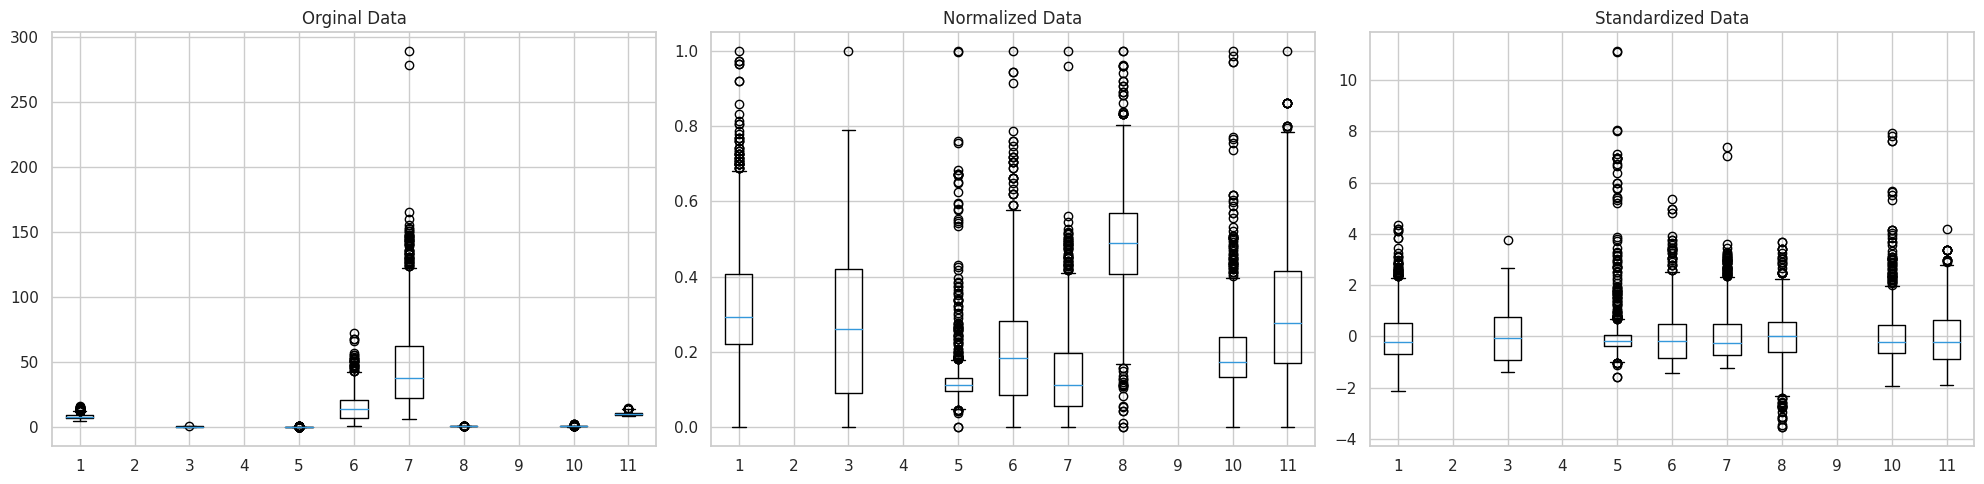

In [81]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler,StandardScaler



df=pd.read_csv('winequality_red.csv',sep=',')

#normalized the data set

scaler =MinMaxScaler()
normalized_df=pd.DataFrame(scaler.fit_transform(df.drop(columns=['quality'])),columns=df.columns[:-1])

# standize the dataset 
scaler=StandardScaler()

standardized_df=pd.DataFrame(scaler.fit_transform(df.drop(columns=['quality'])),columns=df.columns[:-1])

# creating box plots for each attribute

fig,axs=plt.subplots(nrows=1,ncols=3,figsize=(20,5))
axs[0].boxplot(df.drop(columns=['quality']).values)
axs[0].set_title('Orginal Data')
axs[1].boxplot(normalized_df.values)
axs[1].set_title('Normalized Data')
axs[2].boxplot(standardized_df.values)
axs[2].set_title('Standardized Data')
plt.tight_layout()
plt.show()







In [85]:

import pandas as pd
import pandas_profiling
#load the dataset

df=pd.read_csv('winequality_red.csv',sep=',')

#generate the data profiling report
profile= pandas_profiling.ProfileReport(df)
profile.to_file(output_file='wineequality_red_report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]